# From Prices to Returns

The return from time $t$ to time ${t+1} is given by:

$$ R_{t,t+1} = \frac{P_{t+1}-P_{t}}{P_{t}} $$

or alternately

$$ R_{t,t+1} = \frac{P_{t+1}}{P_{t}} - 1 $$


Note : Since Python lists do not operate as vectors, vector operations will not work on lists. Instead we have to use numpy arrays

In [3]:
import numpy as np
prices = np.array([8.70, 8.91, 8.71])
prices

array([8.7 , 8.91, 8.71])

In [4]:
prices[1:]/prices[:-1]-1

array([ 0.02413793, -0.02244669])

ISO using more than one numpy arrays it is easier to use a pandas dataframe

In [5]:
import pandas as pd

In [6]:
prices = pd.DataFrame({"BLUE": [8.70, 8.91, 8.71, 8.43, 8.73],
                       "ORANGE": [10.66, 11.08, 10.71, 11.59, 12.11]})
prices

,BLUE,ORANGE
0,8.70,10.66
1,8.91,11.08
2,8.71,10.71
3,8.43,11.59
4,8.73,12.11


In [7]:
prices[1:]/prices[:-1]-1

,BLUE,ORANGE
0,NaN,NaN
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,NaN,NaN


In [8]:
prices.iloc[1:]/prices.iloc[:-1] - 1

,BLUE,ORANGE
0,NaN,NaN
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,NaN,NaN


The above doesn't work since pandas aligns on row index. We can convert either of them to values

In [9]:
prices.iloc[1:].values/prices.iloc[:-1] - 1

,BLUE,ORANGE
0,0.024138,0.039400
1,-0.022447,-0.033394
2,-0.032147,0.082166
3,0.035587,0.044866


In [10]:
prices.iloc[1:]/prices.iloc[:-1].values - 1

,BLUE,ORANGE
1,0.024138,0.039400
2,-0.022447,-0.033394
3,-0.032147,0.082166
4,0.035587,0.044866


Instead we can use shift()

In [11]:
prices.shift()

,BLUE,ORANGE
0,NaN,NaN
1,8.70,10.66
2,8.91,11.08
3,8.71,10.71
4,8.43,11.59


In [12]:
returns = prices/prices.shift() - 1
returns

,BLUE,ORANGE
0,NaN,NaN
1,0.024138,0.039400
2,-0.022447,-0.033394
3,-0.032147,0.082166
4,0.035587,0.044866


Alternatively we can use the builtin function pct_change

In [13]:
prices.pct_change()

,BLUE,ORANGE
0,NaN,NaN
1,0.024138,0.039400
2,-0.022447,-0.033394
3,-0.032147,0.082166
4,0.035587,0.044866


Reading from csv

In [14]:
prices = pd.read_csv('data/sample_prices.csv')
prices

,BLUE,ORANGE
0,8.7000,10.6600
1,8.9055,11.0828
2,8.7113,10.7100
3,8.4346,11.5907
4,8.7254,12.1070
5,9.0551,11.7876
6,8.9514,11.2078
7,9.2439,12.5192
8,9.1276,13.3624
9,9.3976,14.4080


In [15]:
returns = prices.pct_change()

In [17]:
returns.mean()

BLUE      0.01
ORANGE    0.01
dtype: float64

In [18]:
returns.std()

BLUE      0.023977
ORANGE    0.079601
dtype: float64

Notice that though mean is same the variance in Orange is more than Blue

In [19]:
returns + 1

,BLUE,ORANGE
0,NaN,NaN
1,1.023621,1.039662
2,0.978193,0.966362
3,0.968237,1.082232
4,1.034477,1.044544
5,1.037786,0.973619
6,0.988548,0.950813
7,1.032676,1.117008
8,0.987419,1.067353
9,1.029581,1.078249


<AxesSubplot:>

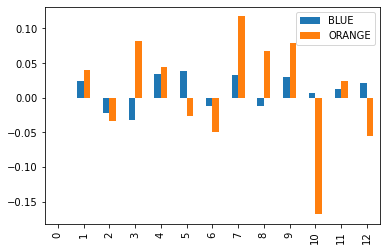

In [20]:
returns.plot.bar()

<AxesSubplot:>

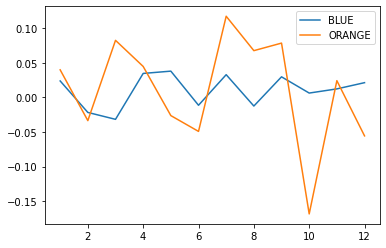

In [21]:
returns.plot()

<AxesSubplot:>

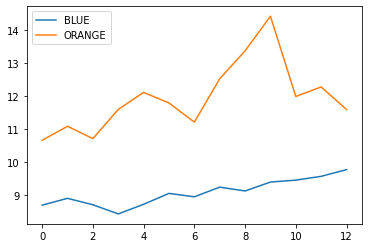

In [22]:
prices.plot()

## Compounding Returns

we can produce the compounded return by multiplying the individual period returns when returns are represented in the form (1+R)

In [24]:
np.prod(returns + 1) - 1

BLUE      0.123310
ORANGE    0.087167
dtype: float64

In [25]:
(returns + 1).prod() - 1

BLUE      0.123310
ORANGE    0.087167
dtype: float64

The difference in compounding returns is quite evident

In [27]:
((returns + 1).prod() - 1).round(2)

BLUE      0.12
ORANGE    0.09
dtype: float64

## Annualizing Returns

To annualize a return for a period, you compound the return for as many times as there are periods in a year. For instance, to annualize a monthly return you compund that return 12 times. 

To annualize a monthly return $R_m$:

$$ (1+R_m)^{12} - 1$$

To annualize a quarterly return $R_q$:

$$ (1+R_q)^{4} - 1$$

To annualize a daily return $R_d$:

$$ (1+R_d)^{252} - 1$$

In [28]:
rm = 0.01
(1+rm)**12 - 1

0.12682503013196977

In [29]:
rq = 0.05
(1+rq)**4 - 1

0.21550625000000023

In [30]:
rd = 0.001
(1+rd)**252 - 1

0.28643404437615216